Для исследования различных составляющий современных IT продуктов (например, пользовательских метрик) применяются инструменты теории вероятной и мат. статистики. В этом ноутбуке рассмотрим некоторые основные понятия.

# Основы теории вероятностей: случайные события

Событие называется **случайным**, если в результате опыта **G** оно может либо произойти, либо нет (в противоположность *детерминированным* событиям). Всевозможные исходы опыта __G__ образуют пространство элементарных событий $\Omega$.

## Алгебра событий

Операции над событиями во многом аналогичны операциям над множествами.

* Сумма событий $C=A + B$ обозначает событие, что в опыте произойдёт либо событие A, либо событие B
* Произведение событий $C=A \cdot B$ обозначает событие, что в опыте произойдут оба события A и B
* Разность событий $C = A \setminus B$ обозначает событие, что в опыте произойдёт событие A, а событие B не произойдёт
* Событие $\overline{A}$ называется _противоположным_ событию **А**, если оно заключается в непоявлении события А в опыте __G__ . 
* События A и B называются *несовместными*, если они не могут произойти в рамках опыта *G* одновременнио, т.е. $A\cdot B = \emptyset$

Говорят, что в опыте G  событие  **A**  влечёт событие __B__ , если из наступления события A следует наступление события B, обозначается $A \subset B$.

## Вероятность события

*Определение* вероятность события **A** - это числовая функция P(A) такая, что выполняются следующие *аксиомы вероятности*:
* Неотрицательность $P(A) \ge 0$
* Нормировка $P(\Omega)=1$
* Конечная аддитивность: $\forall A,B: A\cdot B=\emptyset \mid P(A + B) = P(A) + P(B) $
* Непрерывность вероятности: пусть $A_1 \supset A_2 \supset A_n \supset \ldots \supset A_n \supset \ldots$, тогда $\lim_{n\rightarrow \infty}P(A_n)=0$


*Опредеделение* События $H_1,\ldots,H_n$ образуют **полную группу событий**, если $\forall i,j: H_iH_j=\emptyset$ и $H_1+\ldots+H_n=\Omega$, событие $H_i$ называется *гипотезой*.

$Определение$ События называются независимыми, если
$$
P(AB) = P(A)\cdot P(B)
$$

Опыт, в котором $\forall i:P(H_i) = \frac1n$ (исходы равновероятны) называется *схемой случаев*


*Определение* Условной вероятностью события **A** при условии события __B__ называется вероятность события A при условии, что событие B уже произошло в опыте:
$$
P(A\mid B) = \frac{P(AB)}{P(B)}
$$

Вероятность противоположного события $P(\overline{A})=1-P(A)$

**Алгоритм** решения задач, сводящихся к схеме случаев

* Определить общее число случаев n
* Определить число случаев m, а которых происходит событие A
* Вычислить вероятность события A:
$$P(A)=\frac{m}{n}$$

**Формулы** комбинаторики, которые помогут решать задачи в схеме случаев

* Число перестановок (упорядоченный набор из n элементов)
$$
A_n = n!
$$

* Число размещений (упорядоченный набор k элементов) без повторений из n элементов по k
$$
A_n^k = \frac{n!}{(n-k)!}
$$


* Число размещений с повторением из n элементов по k
$$
\overline{A}_n^k = n^k
$$

* Число сочетаний (набор k элементов из n, когда каждый элемент участвует в наборе только один раз и порядок не важен)
$$
C_n^k = \frac{n!}{k!(n-k)!}
$$


In [13]:
import math

num_students = 20
num_girls = 12

# общее число случаев
n = math.factorial(num_students)

# число благоприятных исходов - возможных последовательностей, когда девушки первые
# ----------------------------------------------------------------------------------
# факториал: math.factorial(num_girls)
# ----------------------------------------------------------------------------------

print('%.7f' % (m/n))

0.0000079


In [3]:
import itertools

import math

def C_n_k(n, k):
    """Число сочетаний из n по k"""
    num_combinations = itertools.combinations(range(n), k)
    return len(list(num_combinations))

k = 2
n = 5

# Проверяем, правильно ли написана функция C_n_k с помощью assert
assert C_n_k(5, 2) == int(math.factorial(n) / math.factorial(k) / math.factorial(n-k))
print('Проверка прошла!')

Проверка прошла!


Как выглядят сгенерированные сочетания из последовательности `(A, B, D)`

In [22]:
list(itertools.combinations('ABD', 2))

[('A', 'B'), ('A', 'D'), ('B', 'D')]

In [4]:
def A_n_k(n, k):
    """Число размещений без повторения"""
    num_permutations = itertools.permutations(range(n), k)
    return len(list(num_permutations))

# Проверяем, правильно ли написана функция A_n_k с помощью assert
assert A_n_k(5, 2), int(math.factorial(5)/math.factorial(5-2))
print('Проверка прошла!')

Проверка прошла!


### Домашняя работа по простым формулам

См. файл [probability_hw.ipynb](https://github.com/aleksandr-dzhumurat/data_management/blob/master/jupyter_notebooks/I_probability.ipynb), он находится рядом в директории

## Основные формулы вычисления вероятности.

**Формула** Умножение вероятностей
$$
P(A_1\cdot\ldots\cdot A_n) = P(A_1)\cdot P(A_2\mid A_1)\cdot P(A_3\mid A_2A_1)\ldots\cdot P(A_n\mid A_{n-1}\ldots A_1)
$$
В случае, если события независимы
$$
P(A_1\cdot\ldots\cdot A_n) = P(A_1)\cdot P(A_2)\cdot\ldots\cdot P(A_n)
$$

**Формула** Сложение вероятностей - для оценки вероятности появления хотя бы одного события из $n$:
$$
P(A_1+\ldots+A_n) = \sum_{i=1}^{n} (-1)^{i-1}p_i, 
$$
где

$$
p_1=\sum_{i=1}^{n}P(A_i), p_2=\sum_{i=1}^{n-1}\sum_{j=i+1}^{n}P(A_iA_j),\ldots,p_n=P(A_1\cdot\ldots\cdot A_n)
$$

Например, для трёх событий

$$
P(A_1+A_2+A_3) = P(A_1)+P(A_2)+P(A_3)-P(A_1A2)-P(A_2A_3)-P(A_1A_3)+P(A_1A_2A_3)
$$

**Формула** Схема Бернулли. Пусть проводится $n$ независимых испытаний с двумя возможными исходами - событие $A$ произошло с вероятностью $P(A)=p$, либо событие $A$ не произошло с вероятностью $P(\overline{A})=q=1-p$, где событие A называется **успехом**. Такой дизайн эксперимента называется *схемой Бернулли*.

Веростность, что в серии событие $A$ произойдёт ровно m раз вычисляется по формуле
$$
p_n(m) = P(A_n(m)) = C_n^mp^m(1-p)^{n-m}
$$

**Формула** Формула полной вероятности. Пусть $H_1,\ldots,H_n$ - полная группа событий. Тогда вероятность произвольного события $A$ выражается формулой
$$
P(A) = \sum_{i=1}^{n}P(H_i)P(A\mid H_i)
$$

**Формула** Формула Байеса используется для вычисления апостериорной вероятности гипотезы 
$$
P(H_i\mid A) = \frac{P(H_i)P(A\mid H_i)}{\sum_{i=1}^{n}P(H_i)P(A\mid H_i)}
$$

### Задачи

#### Задача 1

![ivi_main](img/ivi_main.png)

Рассмотрим трафик на карточке с фильмом в ivi. На прямые переходы из поисковых сист приходится в два раза больше трафика, чем на  просмотры из центрального промо-блока.

При этом конверсия в просмотр при прямом заходе составляет 0.1, а конверсия в просмотр при переходе с ЦПБ 0.3. Найти вероятность того, что случайно зашедший пользователь совершит просмотр.

In [ ]:
# ---- ВАШ КОД ТУТ ---


# --------------------

### Наивный байесовский классификатор (Naive Bayes)

Пользуясь теоремой Байеса, можно выбирать по результатам опыта наиболее вероятную гипотезу, апостериорный выбор наиболее вероятной гипотезы можно рассматривать как решение задачи классификации (каждая гипотеза из пространства гипотез является меткой класса):
$$
P(C|X) = \frac{P(C)P(X\mid C)}{P(X)}
$$

![bayes.png](img/bayes.png)

где $P(C|X)$ - апостериорная вероятность класса, $P(C)$ - априорная вероятность класса, $P(X\mid C)$ - правдоподобие (likelihood), $P(X)$ - априорная вероятность данных.

Для примера возьмём кусок датасета [пассажиров Титаника](https://www.cs.toronto.edu/~delve/data/titanic/desc.html)

| Class  | Survived |
| --- | --- |
|	2nd	|	no	|
|	3rd	|	yes	|
|	1st	|	yes	|
|	3rd	|	no	|
|	1st	|	no	|
|	3rd	|	no	|
|	3rd	|	no	|
|	3rd	|	no	|
|	3rd	|	no	|
|	3rd	|	no	|
|	3rd	|	no	|
|	2nd	|	no	|
|	3rd	|	no	|
|	3rd	|	yes	|
|	3rd	|	no	|
|	1st	|	no	|
|	3rd	|	no	|
|	3rd	|	yes	|
|	3rd	|	no	|

Найти вероятность события 
$$
P(Survived = Yes | Class= 1st) = \frac{P(Class=1 | Survived = Yes) \cdot P(Survived = Yes)}{P(Class=1)}
$$

**Самостоятельная работа**

Найдите с помощью теоремы Байеса вероятность выжить при условии, что у пассажира билет первого класса

In [3]:
import pandas as pd

df = pd.DataFrame(
    {
        'Class': ['2nd', '3rd', '1st', '3rd', '1st', '3rd', '3rd', '3rd', '3rd', '3rd', '3rd', '2nd', '3rd', '3rd', '3rd', '1st', '3rd', '3rd', '3rd'],
        'Survived': ['no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no']
    }
)

df.head(3)

Class Survived
0   2nd       no
1   3rd      yes
2   1st      yes

#### Байесовский классификатор текстов

Описаный подход можно обобщить на многомерный случай - для примера решим задачу классификации текстов. Возьмём набор данных [с текстами смс-сообщений](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) В датасете два поля - **текст смс-сообщения** на английском и **класс смс сообщения**. В наборе два класса сообщений: спам и не-спам. Задача классификатора - по тексту сообщения определить его класс, то есть понять, является ли сообщение спамом.

Класс смс-сообщения определям при помощи теоремы Байеса:
$$
c_{MAP} = \arg \max_{\substack{c \in C}}P(c \mid X) = \arg \max_{\substack{c \in C}}\frac{P(c)P(X\mid c)}{P(X)}
$$

MAP - Maximum a posteriori estimation, то есть такая оценка называется "оценкой апостериорного максимума", т.к. мы находим гипотезу $c \in C$, которая имеет максимальную апостериорную вероятность.

В формуле выше $X$ -это полученные в результате опыта данные, то есть сами документы (текстовые сообщения), каждый документ представляет собой эксперимент с исходом $x \in X$.

Нужно как-то перейти от числового описания к векторному. Каждый документ $x \in X$ будем представлять через входящие в этот документ слова в виде вектора $x = [x_1, \ldots, n_n ]$, где n - общее количество (различных) слов во всех документах коллекции, т.н. размер словаря. При этом
$$
\forall i: x_i = \left\{ 
\begin{array}
 \tex{1}, x_i \in x \\
 0, \text{otherwise}
\end{array}
\right.
$$
тогда
$$
c_{MAP} = \arg \max_{\substack{c \in C}}\frac{P(c)P(x_1\cdot \ldots \cdot x_n\mid c)}{P(X)}
$$

Т.к. $\forall c$ величина $P(X)$ будет постоянной. Ещё мы можем посчитать $P(c)$ как эмпирическую частоту гипотезы по имеющимся данным.

Самое сложное это вычислить $P(x_1\ldots x_n\mid c)$, формула произведения вероятностей будет слишком сложной. Выход из этой ситуации - применить сильное предположение о независимости признаков.
$$
P(x_1\ldots x_n\mid c) = P(x_1 \mid c)\cdot \ldots \cdot P(x_n\mid c) = \prod_{i=1}^nP(x_i\mid c)
$$
При этом $\forall i: P(x_i \mid c)$ это частота встречаемости слова $x_i$ в категории $c$ - величина, которую можно  вычислить просто. Этот подход в общем виде описан [в статье Сергея Николенко](https://habr.com/company/surfingbird/blog/150207/). Некоторые улучшения алгоритма (например, сглаживание) описаны в [статье на Хабре](https://habr.com/post/415963/), а по [этой ссылке](https://habr.com/post/120194/) доступен код на python. О разных подходах к векторизации текста можно почитать [тут](http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf) и [тут](http://lpcs.math.msu.su/~pentus/opm/simple_classifiers.pdf)

Обучение наивного байесовского классификатора сводится к вычислению по корпусу текстов (тренировочных данных) относительных частот по категориям, тогда мы получаем т.н *multinomial bayes model*:
$$
\forall i,j: P(x_i \mid c_j) = \frac{n_{c_j}(x_i)}{\sum_{k\in V}n_{c_k}(x_i)}
$$
где $n_{c_j}(x_i)$ - количество раз, которое слово $x_i$ встречается в теме $c_j$, а $V$ - *словарь* корпуса документов, множество всех слов

Задача - реализовать класс наивного байесовского классификатора согласно спецификации

In [1]:
"""имплементация наивного байесовского классификатора"""
class NaiveBayes:
    def __init__(self):
        pass

    def fit(self, data: list, target: list):
        """

        :param data: массив документов, каждый документ - объект типа str
        :param target: массив меток объектов
        :return:
        """
        pass

    def predict(self, data: list):
        """

        :param data: массив документов, для каждого из которых нужно предсказать метку
        :return:
        """
        pass

Реализовать классификатор в файле `naive_bayes_hw.ipynb`

# Основы теории вероятностей: случайные величины

## Дискретные СВ

Случайная величина- это целочисленная функция над случайным событием $X(\omega): \Omega \rightarrow R^1$. *Реализация* случайной величины - это конкретное значение, полученное в результате эксперимента.

*Дискретная случайная величина* задаётся таблицей распределения

| x  | x_1 | x_2 | $\ldots$ | x_n |
| --- | --- | --- | --- | --- |
|	p	|	p_1	| p_2 | $\ldots$ | p_n |

Причём выполняется условие нормировки $p_1+\ldots p_n = 1$

(дописать примеры)

### Числовые характеристики дискретных СВ

**Математическое ожидание** это аналог среднего арифметического
$$
m_x = M[X] = \sum_{i=1}^{N}x_ip_i
$$

**Дисперсия** является мерой разброса в реализациях случайной величины
$$
d_x = D[X] = \sum_{i=1}^{N}p_i(x_i-m_i)^2
$$

### Пример: биномиальное распределение

Случайная величина $X$ с реализациями $x_k=k, k=\overline{0, n}$ имеет биномиальное распределение $X \sim Bi(n,p)$ с параметрами $n$ и $p\in(0,1)$, если вероятность события ${X = x_k}$ вычисляется по формуле Бернулли:
$$
p_n(k) = P{X=x_k} = C_n^kp^kq^{n-k}, q=1-p
$$
Характеристики СВ, распределённой биномиально 
$$M[X]=n\cdot p; D[X] = npq$$

Другой пример дискретного распределения - распределение Пуассона.

## Непрерывные СВ

*Непрерывная случайная величина* задаётся функцией плотности распределения $f(x)$. С помощью плотности можно вычислить вероятность попадения СВ в интервал
$$
P(a\le X \le b) = \int_a^b f(x)dx
$$
Функция распределения - это интеграл плотности вероятности
$$
F(x) = \int_{-\infty}^{x}f(t)dt
$$

### Пример: нормальное (гауссовское) распределение

$X \sim N(\mu, \sigma)$, где $\mu=m_x$ - матожидание и $\sigma^2=d_x$ - дисперсия.
Плотность вероятности
$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}exp\left( -\frac{(x-m_x)^2}{2\sigma^2} \right)
$$
Функция распределения
$$
F(x) = \int_{-\infty}^{x}f(t)dt = \Phi\left( \frac{x-m}{\sigma}\right)
$$
где $\Phi$ - функция Лапласа $\Phi(x) = \frac12 + \Phi_0(y)$, которая обладает свойством симметричности $\Phi(x) = -\Phi(-x)$
$$
P\left( \frac{|x-m|}{\sigma} \le k \right) = 2\Phi_0(k)
$$

Вероятность попадания случайной величины $X \sim N(\mu, \sigma^2)$ в интервал $[\alpha, \beta]$:
$$
P(\alpha< X < \beta) = \Phi_0\left(\frac{\beta - a}{\sigma}\right) - \Phi_0\left(\frac{\alpha - a}{\sigma}\right)
$$

### Центральная предельная теорема

{X_n} - последовательность независимых одинаково распределённых случайных величин, причём $\forall n: D[X_n]=\sigma^2<\infty, M[X_n]=\mu$, тогда
$$
\frac{\sum_{i}^{n}X_i - \mu n}{\sigma\sqrt{n}} \rightarrow N(0,1)
$$

Другими словами $\sum_{i}^{n}X_i \sim N(n\mu, n\sigma^2)$

## Другие характеристики СВ

**Квантилю** уровня $p$ случайной величины с функцией распределения $F(x)$ называется такое значение $x_p$, при котороым выполняется условие
$$
x_p = \{\min{x}: F(x) \ge p\}
$$
Квантиль уровня $p=\frac{1}{2}$ называется *медианой* распределения.

# Случайные величины в жизни

Откуда берутся случайные величины в интернет-сервисах?

Все процессы случайны - ежедневно приходит случайное количество пользователей, которые совершают случайное количество действий. Задача аналитика - понять законы, по которым протекают эти случайные процессы и учесть влияние случайностей в аналитике для избежания ошибок.

Например, рассмотрим продуктовую метрику "конверсия из показа карточки контента в просмотр":  
* пользователь заходит на главную страницу ivi
* рекомендательная система показывает постеры нескольких карточек контента
* если рекомендательная система угадалы вкусы пользователя - начинается просмотр контента. Если выдача рекомендаций пользователю не подходит - событие "просмотр контента" не возникает

![main_page_ivi](img/main_page_ivi.png)

Вычислим эту метрику с помощью SQL на основании данных событийной аналитики
* берём только события с платформ `xboxOne` и `Windows 10`
* тип события `page_impression` (показ контента) и `click` (клик по постеру)
* валидация событий: просмотры, у которых отсутствует `impression` из выборки исключаем
* считаем конверсию по датам в разбивке по платформам

Цель исследования - понять, есть ли отличия в конверсии между просмотрами на платформах `xboxOne` и `Windows 10`

In [5]:
import os
import pandas as pd
from sqlalchemy import create_engine


postgres_host = '178.154.200.231' # '40.89.151.14' #os.environ['APP_POSTGRES_HOST']
database = 'postgres'
port = '5433' # '5433'
user = 'mai'
password = '1930'

engine = create_engine(
    f'postgresql://{user}:{password}@{postgres_host}:{port}/{database}'
)

sql_str = """
SELECT
    date,
    subsite_title,
    SUM(content_watch)::float / SUM(content_impression)::float as conversion
FROM (
    SELECT
        user_id_for_mai,
        content_id,
        subsite_title,
        to_char(to_timestamp(rocket_datetime), 'YYYY-MM-DD') as date,
        MAX(CASE WHEN name in ('page_impression', 'click') THEN 1 ELSE 0 END) as content_impression,
        MAX(CASE WHEN name='content_watch' THEN 1 ELSE 0 END) as content_watch
    FROM movie.events
    WHERE
        content_id > 0
        AND subsite_title in ('xboxOne', 'Windows 10')
    GROUP BY user_id_for_mai, content_id, date, subsite_title
) as content_watches
WHERE
    content_impression > 0
GROUP BY date, subsite_title
ORDER BY date, subsite_title
"""

conversion_df = pd.read_sql(sql_str, engine)

conversion_df.head()

date subsite_title  conversion
0  2019-06-01    Windows 10    0.197802
1  2019-06-01       xboxOne    0.200704
2  2019-06-02    Windows 10    0.287532
3  2019-06-02       xboxOne    0.270677
4  2019-06-03    Windows 10    0.439331

Визуализация метрики

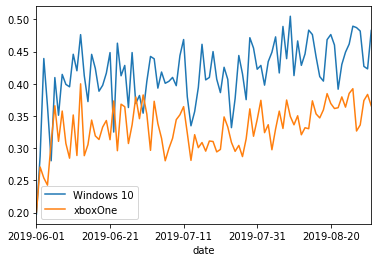

In [6]:
%matplotlib inline

df1 = conversion_df[conversion_df['subsite_title']=='Windows 10']
df2 = conversion_df[conversion_df['subsite_title']=='xboxOne']


ax = df1.plot(x='date', y='conversion', label='Windows 10')
df2.plot(x='date', y='conversion', ax=ax, label='xboxOne')

Мы видим, что конверсия - это случайная величина. В связи с этим бывают дни, когда конверсия выше на `Windows 10`, а иногда - на `xboxOne`. Как ответить на вопрос "Где конверсия выше", если в разные дни по-разному?

На этот вопрос поможет ответить аппарат математической статистики. Для начала проверим распределение конверсии с помощью гистограммы: 

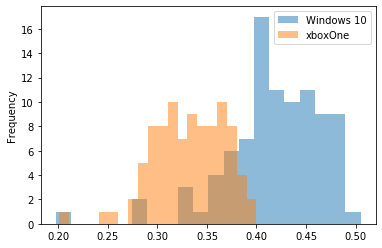

In [9]:
# Windows 10
ax = conversion_df[
    conversion_df['subsite_title']=='Windows 10'
]['conversion'].plot(kind='hist', alpha=0.5, bins=20, label='Windows 10', legend=True)

# xboxOne
conversion_df[
    conversion_df['subsite_title']=='xboxOne'
]['conversion'].plot(kind='hist', alpha=0.5, bins=20, label='xboxOne', legend=True)

Распределение конверсии для платформы `Windows 10` смещено влево относительно конверсий на платформе `xboxOne` - это подтверждает нашу догадку о том, что конверсия на `Windows 10` выше. Об инструментах, которые помогут ответить на этот вопрос более точно, мы поговорим в разделе "Проверка статистических гипотез"

Для закрепления материала выполните домашнюю работу в файле [probability_hw2.ipynb](./probability_hw2.ipynb), раздел **Часть I: исходные данные**.

## Работа с СВ в Python

Для работы со случайными величинами в python  существует несколько модулей

* random: https://docs.python.org/3/library/random.html
* scipy.stats https://docs.scipy.org/doc/scipy/reference/stats.html
* numpy.random https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
%matplotlib inline

Пример дискретно распределённой случайной величины

In [18]:
import numpy as np

X = np.random.choice([1, 2, 3, 4], size=100, replace=True)

# задача - посчитать вероятности p_1,..., p_4
p1 = np.where(X==1)[0].size / X.size
p2 = np.where(X==2)[0].size / X.size
p3 = np.where(X==3)[0].size / X.size
p4 = np.where(X==4)[0].size / X.size

print(f"p1={p1}, p2={p2}, p3={p3}, p4={p4}")

p1=0.19, p2=0.25, p3=0.3, p4=0.26


Функции распределения из библиотеки scipy, statsmodels

In [2]:
x = random_var.rvs(size=sample_size)
x

array([-1.6648916 , -1.13386812, -0.48203777,  1.48353681,  0.4218947 ,
        0.16229693, -1.08489009, -0.08781953, -0.47486098, -1.11205698,
        0.11270725,  1.33716674,  1.14352269,  0.26887085,  1.43606789,
       -0.84598197, -1.68004762,  0.41232683, -0.71787534, -0.4591046 ,
        3.51434182, -0.50979159,  0.93596285, -1.07160312,  0.99296117,
        0.45104493, -1.06069859,  0.22253537,  1.08676532, -0.87195908])

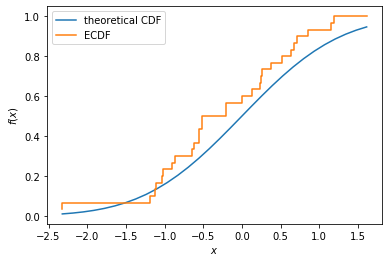

In [7]:
from scipy.stats import norm

# выбрать распределение https://docs.scipy.org/doc/scipy-0.16.1/reference/stats.html#continuous-distributions
random_var = norm
sample_size = 30

# генерим случайную выборку
x = random_var.rvs(size=sample_size)
n_linspace = np.linspace(start=x.min(), stop=x.max(), num=sample_size)
cdf = random_var.cdf(n_linspace)
plt.plot(n_linspace, cdf, label='theoretical CDF')

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(x)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

**Задача** Сгенерируйте точки из гаусссовского распределения $N(\mu, \sigma)$ и найдите [экспериментальную (выборчную) квантиль](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%B2%D0%B0%D0%BD%D1%82%D0%B8%D0%BB%D1%8C) уровня 5%. Найдите теоретическое значение квантили c с помощью scipy.

In [22]:
import math

mu, sigma = 0.0, 0.1

# создадим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)

# сгенерируем 1000 значений
sample = norm_rv.rvs(size=1000)

# найдите квантиль уровня p = 5% по выборке
q_level = 0.05
variational_series = np.sort(sample)
variational_series_index = math.floor(q_level*sample.size + 1)
variational_series_index
p005_empirical = variational_series[variational_series_index]

# найдите теоретическое значение квантили
p005_theoretical = norm_rv.ppf(q=q_level)

print(f"p005_empirical={p005_empirical}, p005_theoretical={p005_theoretical}")

p005_empirical=-0.1677205775147565, p005_theoretical=-0.1644853626951473


Гистограмма - это способ отображения плотности распределения случайной величины. Сгенерируйте выборку из любого распределения и постройте график гистограммы.

Text(0.5, 0, '$x$')

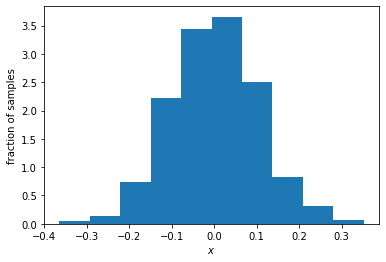

In [23]:
plt.hist(sample, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Визуализация Центральной предельной Теоремы

Text(0.5, 0, '$x$')

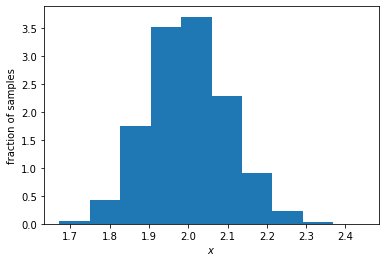

In [24]:
results = []
n = 100

exp_rv = sts.expon(1)
for i in range(10000):
    x = exp_rv.rvs(n)
    results.append(x.mean())

plt.hist(results, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

## Предсказательный и доверительный интервалы

Величина $1-\alpha$ называется *доверительной вероятностью* или *уровнем доверия(надёжности)*, если для случайной величины $X$ выполняется условие
$$
P\left(X_{\frac{\alpha}{2}} \le X \le X_{1-\frac{\alpha}{2}} \right) = 1 - \alpha
$$

В этом выражении $[X_{\frac{\alpha}{2}}, X_{1-\frac{\alpha}{2}} ]$ - это значения квантилей уровня $\frac{\alpha}{2}$ и $1-\frac{\alpha}{2}$ соответственно, которые являются границами предсказательного интервала.

**Пример** пусть результат эксперимента представляет собой нормально распределённую СВ $X\sim N(\mu, \sigma)$. Тогда предсказательный интервал выражается через квантиль стандартного нормального распределения и имеет вид
$$
P\left(\mu - Z_{1 - \frac{\alpha}{2}}\sigma \le X \le \mu + Z_{1-\frac{\alpha}{2}} \sigma\right) = 1 - \alpha
$$

**Задача** постройте предсказательный интервал для случайной величины $X\sim N(\mu, \sigma)$:

In [31]:
from scipy.stats import norm

mu = 5
sigma = 0.9
alpha = 0.05
# используйте функцию ppf - Percent point function (обратная к кумулятивной функции (функции вероятности) cdf)

z_05 = mu - norm.ppf(q=1-alpha/2)*sigma
z_95 = mu + norm.ppf(q=1-alpha/2)*sigma

print(f"z_05 = {z_05}, z_95 = {z_95}")

z_05 = 3.2360324139139514, z_95 = 6.763967586086048


### Интервальная оценка параметров по выборке

Мы знаем, что метрики в IT-сервисах являются реализациями случайных величин - например, мы выгрузили выборку конверсии по дням и увидели, как колеблется график этой метрики.

Основная задача статистики - проанализировать выборку и сделать выводы о характеристиках случайной величины, которая эту выборку породила (спойлер: чаще всего интересно оценивать математическое ожидание $m_X$)

В результате эксперимента мы получаем выборку $X^n = \left( X_1,\ldots,X_n \right)$, порождённую СВ $X$. Мы делаем какие-то предположения о законе распределения $X~F(x, \theta)$, где $F(\cdot)$ - некоторое семейство функций распределения, а $\theta$ - параметры, которые определяют конкретную функцию из семейства. Тогда доверительный интервал для параметра $\theta$ имеет вид (в общем случае):
$$
P\left(\theta_1(X^n) \le \theta \le \mu + \theta_2(X^n) \right) = 1 - \alpha
$$
где $[\theta_1(X^n), \theta_2(X^n)]$ - границы доверительного интервала параметра $\theta$. Вопрос на засыпку: чем отличается доверительный интервал от предсказательного?

**Пример** Доверительный интервал для математического ожидания гауссовской СВ.

СВ $X\sim N(\mu, \sigma)$, где $\sigma$ известный параметр. По результатам эксперимента получили выборку $X^n = \left( X_1,\ldots,X_n \right)$. Задача - оценить по выборке неизвестный параметр $\mu$.

Чтобы построить доверительный интервал параметра $\mu$ в первую очередь нужно понять, какое распределение имеет параметр, который мы исследуем. В данном случае мы можем воспользоваться результатами ЦПТ:
$$
\overline{X} \sim N\left(\mu, \frac{\sigma^2}{n}\right), \overline{X} = \frac{\sum_{i=1}^{n}X_i}{n}
$$

где $\overline{X}$ - среднее значение элементов выборки. В таком случае доверительный интервал имеет вид
$$
P\left(\overline{X} - z_{1 - \alpha/2}\sqrt{\sigma^2/n} \le  \mu \le \overline{X} + z_{1 - \alpha/2}\sqrt{\sigma^2/n}\right) = 1 - \alpha
$$

Для определения значения квантили можно пользоваться функцией `.ppf` из модуля `scipy.stats`.

In [33]:
import numpy as np
from scipy.stats import norm

mu = 5
sigma = 0.9
alpha = 0.05
X = norm(loc=mu, scale=sigma).rvs(size=30)
X

array([6.788326  , 4.4618662 , 5.20718166, 4.45941703, 4.25388513,
       4.22325771, 4.47954889, 4.92059964, 3.49209709, 6.42913494,
       4.50092417, 5.09609605, 2.83135894, 3.52183385, 4.78827475,
       4.82781361, 4.96017267, 3.4442964 , 4.81109784, 4.51495463,
       6.09392755, 5.02513349, 5.02500942, 5.87633962, 5.6743764 ,
       4.85601852, 6.1161912 , 6.26292774, 4.94243004, 5.04319176])

In [34]:
# используйте функцию ppf для нахождения квантили
alpha = 0.05

n = X.size
left_border = X.mean() - norm.ppf(1 - alpha/2)*np.sqrt(sigma**2/n)
right_border = X.mean() + norm.ppf(1 - alpha/2)*np.sqrt(sigma**2/n)

print(f"Оценка математического ожидания по выборке mu = [{left_border}, {right_border}]")

Оценка математического ожидания по выборке mu = [4.575534485968654, 5.219644377706831]


## Применение ЦПТ к анализу экспериментов

Для анализа результатов эксперимента можно применить теорему Муавра-Лапласа

$$
P(l<M<k) = \Phi_0\left(\frac{k-np}{\sqrt{npq}}\right) -  \Phi_0\left(\frac{l-np}{\sqrt{npq}}\right)
$$

Можно заметить, что для определения предсказательно интервала достаточно знать значение вероятности успеха $p$ в серии экспериментов по схеме Бернулли.

### Эксперименты по схеме Бернулли

Пусть проводится эксперимент по схеме Бернулли, в каждом из $n$ опытов событие $A$, которое мы называем успехом эксперимента, происходит с вероятностью $p$, причём точное значение вероятности $p$ нам неизвестно. Количество успехов в серии опытов $X$, тогда величина $\hat{p}$
$$
\hat{p} = \frac{X}{n}
$$
является оценкой параметра $p$. Если для $\hat{p}$ выполняются условия
$$
\left\{ 
\begin{array}{l}
 \mid \hat{p} - p\mid < \delta \\
 P(\mid\hat{p} - p\mid < \delta) = 1-\alpha
\end{array}
\right.
$$
то выборка называется **репрезентативной** при уровне доверия $\alpha$, где $\delta$ - желаемая точность.


##### Задание

Посчитайте конверсию по выборке

In [38]:
import pickle

with open('data/pool_sample.pkl', 'rb') as f:
    pool_data = pickle.load(f)

conversion = None
# ---- ВАШ КОД ТУТ ---

p = sum(pool_data) / len(pool_data)

# --------------------
p

0.77

Пример с **социологическим опросом**: пусть $X$ - количество положительно ответивших респондентов, $X\sim Bi(n,p)$. При $n\rightarrow \infty$ согласно ЦПТ $X\sim N(np, npq)$

Воспользуемся теоремой Муавра-Лапласа:
$$
P(\mid\hat{p} - p\mid < \delta) = P\left(-\delta < \hat{p} - p <\delta \right)
$$

В силу свойств математического ожидания и дисперсии
$$
\frac{X}{n}\sim N\left(\frac{np}{n}, \frac{npq}{n^2}\right) \sim N\left(p, \frac{pq}{n} \right)
$$

Окончательно
$$
\frac{X}{n} - p \sim N\left(p-p, \frac{pq}{n}\right)  \sim N\left(0, \frac{pq}{n}\right)
$$

В соответствии вероятностью попадания СВ в интервал
$$
P(\mid\hat{p} - p\mid < \delta) = 2\Phi_0\left(\frac{\delta-m_x}{\sqrt{d_X}}\right) = 2\Phi_0\left(\frac{\delta-0}{\sqrt{\frac{pq}{n}}}\right) = 2\Phi_0\left(\frac{\delta\sqrt{n}}{\sqrt{pq}}\right)
$$
Перейдём к доверительной вероятности
$$
2\Phi_0\left(\frac{\delta\sqrt{n}}{\sqrt{pq}}\right) = 1 - \alpha \rightarrow \Phi_0\left(\frac{\delta\sqrt{n}}{\sqrt{pq}}\right) = \frac12 - \frac{\alpha}{2}
$$
Воспользуемся определением квантили:
$$
\frac{\delta\sqrt{n}}{\sqrt{pq}} = Z_{\frac{1}{2}+\left(\frac{1}{2}-\frac{\alpha}{2}\right)} = Z_{1-\frac{\alpha}{2}} \longrightarrow n = \left( \frac{Z_{1-\frac{\alpha}{2}}}{\delta}\right)^2pq
$$

При таком значении $n$ выборка будет репрезентативной

Каким образом определить значения $p,q$:
1. из прошлых исследований;
1. еcли дополнительной информации нет, то выбрать $p=q=\frac12$;
1. если известен интервал для $p\in[\alpha, \beta]$, то нужно выбирать значение, максимально близкое к $\frac12$

**Задача** За кандидата собираются голосовать 30-40%. Сколько нужно опросить респондентов, чтобы оценить долю голосов за кандидата с точность $2\%$.

Написать функцию, которая рассчитывает объём репрезентативной выборки

In [47]:
import math
from scipy.stats import norm

def representative_sample_size(alpha, delta, p=None) -> n:
    """Функция для расчёта объёма репрезентативной выборки
    
    :param alpha: уровень доверия
    :param delta: точность
    :param p (list | int | None): теоретическая вероятность успеха 
    :return: 
    """
    n = (norm.ppf(1 - alpha / 2) / delta )**2 * p * (1 - p)
    
    return math.ceil(n)

Смоделируйте эксперимент с соц-опросом с помощью распределения Бернулли

* сгенерируйте выборку того размера, который рассчитали
* посчитайте прогнозируемый рейтинг кандидата 

In [61]:
from scipy.stats import bernoulli

# ---- ВАШ КОД ТУТ ---

_p = 0.4 # задайте тут правильное значение
_alpha = 0.05
_delta = 0.02

repr_sample_size = representative_sample_size(alpha=_alpha, delta=_delta, p=_p)

# генерим выборку
bernoulli_sample = bernoulli(p=_p).rvs(size=repr_sample_size)
# определяем рейтинг
predicted_rating = bernoulli_sample.mean()

print('sample_size = %d, predicted_rating = %.5f' % (repr_sample_size, predicted_rating))

# --------------------

sample_size = 2305, predicted_rating = 0.40477


# Проверка статистических гипотез

## Основные определения

**Статистическая гипотеза** - любое предположение о законе распределения случайной величины.

Чтобы проверить статичтическую гипотезу, нужно проанализировать выборку независимых, одинаково распределённых случайных величин $X^n = {X_1,\ldots,X_n}$.

Статистика $T(X^n)$ - любая функция, которая вычисляется по значением выборки


Т.к. метрики IT-сервисов являются реализацией случайных величин, то для проверки различных предположений о значениях этих метрик можно использовать механизмы проверки статистических гипотез 

Алгоритм проверки статистических гипотез

1. Сформулировать основную гипотезу $H_0$ и альтернативную гипотезу $H_{\text{a}}$
1. Выбрать значение уровня значимости $\alpha: \alpha = P(H_{\text{a}}|H_0)$
1. Выбрать статистику  $T(X^n)$ 
1.Установить закон распределения статистики $F$ в случае, когда нулевая гипотеза верна
$$T(X^n|H_0)\sim F; T(X^n|H_0)\not\sim F$$
1. Построить доверительную область и критическую область
1. Вычислить реализацию статичтики
1. Принять решение об истинности гипотезы

Таким образом мы выдвигаем какое-то предположение о данных (гипотезу) и на основе данных эксперимента делаем вывод о том, верна ли наша гипотеза.

**p-value** - достигаемый уровень значимости: вероятность получить в результате повторных экспериментов такие же, или ещё более экстремальные значения статистики критерия при условии, что $H_0$ - справедлива. Малые значения $p$-value свидетельствуют **против** гипотезы $H_0$.

В пакетах для проведения статистических тестов на Python вычисляется не критическая область значений статистики, а именно *$p$-value*, которое соответствует полученной реализации статистики.

На картинке пример статистики, которая распределена нормальным образом - в центре область, где значения статистики подтверждают нулевую гипотезу, а справа и слева т.н. *критические области*, где значения статистики *отвергают* гипотезу $H_0$

![stat_test](img/stat_test.jpg)

Если p-value мало, значит данные эксперимента свидетельствуют против нулевой гипотезы. Величину $p-value$ сравнивают с порогом, который определяют перед началом эксперимента: $p \le \alpha \longrightarrow H_0$ отвергается в пользу альтернативы $H_1$ . $\alpha$ называют уровнем значимости (обычно принимают  $\alpha = 0.05$).

При оценивании статистических критеритериев различаю ошибки I и II рода

| -  | H_0 верна | H_1 верна |
| --- | --- | --- |
|	Приняли H_0	| Верное решение	| Ошибка II рода |
|	Отклонили H_0	|	Ошибка I рода	| Верное решение |


При проверке гипотез ошибка I рода более критична - она ограничена сверху:
$$
P(H_1 |  H_0 - верна) = P(p \le \alpha | H_0 ) \le \alpha 
$$

Гипотезы неравнозначны - $H_0$ либо отвергается, либо не отвергается. Ошибка II рода мягко минимизируется - выбираем критерий с наибольшей мощностью $\beta$ (из единицы вычитаем ошибку II рода):
$$
\beta = 1- P(H_0 |  H_1 - верна)
$$

Мощность - это характеристика того, насколько хорошо статистистический критерий отклоняет неверную гипотезу $H1$

При планировании экспериментов по проверке статистических гипотез нужно соблюдать следующие правила (experiment design):

* выбрать критерий
* задать уровень значимости (ошибку I рода)
* выбрать ожидаемый размер эффекта
* определить необходимый объём выборки

Критерий называется **параметрическим**, если мы делаем какие-то предположения о принадлежности плотности распределения статистики в какому-то семейству функций. Если таких предположений не делается, критерий называется **непараметрическим**.

## Примеры продуктовых гипотез

## Примеры статистических критериев

### z-критерий Стьюдента (одновыборочный)

Пусть результат эксперимента - простая выборка (i.i.d., Independent and identically distributed)
$$
X^n = N(X_1,\ldots,X_n) , \forall i: X_i \sim N(\mu,\sigma^2), \sigma - \text{известная величина}
$$

Нулевая гипотеза и альтернатива:

$$
\left\{
\begin{array}{c}
H_0: \mu=\mu_0 \\
H_1: \mu_1 \neq \mu_0
\end{array}
\right.
$$

Статиcтика критерия:
$$
Z(X^n) = \frac{\overline{X}- μ_0}{\frac{\sigma}{\sqrt{n}}}
$$

Нулевое распределение: 
$$
Z(X^n) \sim N(0,1)
$$

На уровне значимости $\alpha$ гипотеза $H_0$ отвергается при значении статистики $Z(X^n)=z$ таком, что $z \lt z_\alpha$, где $z_\alpha$ - значение квантили нормального распределения уровня $\alpha$.



#### Задача на одновыборочный z-критерий

Средняя масса детей в неблагополучных семьях при рождении 2.8 кг.
В экспериментальной программе ведения беременности участвовали 25 женщин.	
Средний вес младенцев в экспериментальной группе составил 3.075 кг.
Является ли данное отклонение статистически значимым? Исходя из прошлых иследований известно, что вес имеет нормальное распределение с $\sigma = 0.5$ при $alpha=0.05$

Основная гипотеза H0:		X_среднее = 2.8

Альтернативная гипотеза H1:		X_среднее > 2.8

In [66]:
from scipy.stats import norm

# Размер выборки
n = 25
# С.К.О.
sigma = 0.5
# Уровень доверия 
alpha = 0.05
# Значение квантили
z_095 = norm.ppf(q=0.95)

# Ср. знач. в ген. совокупности
global_mean = 2.8
# Ср. знач. в эксперименте
sample_mean = 3.075

# Считаем статистику
Z_x = (sample_mean - global_mean) / (sigma / np.sqrt(n))
# Критическая область:
Z_critical = z_095
print("Является ли отклонение значимым: %s, значение статистики Z_x=%.4f" % (Z_x > Z_critical, Z_x))

Является ли отклонение значимым: True, значение статистики Z_x=2.7500


[Реализация ztest](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html) из statsmodels

In [68]:
from statsmodels.stats.weightstats import ztest

help(ztest)

Help on function ztest in module statsmodels.stats.weightstats:

ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
    test for mean based on normal distribution, one or two samples
    
    In the case of two samples, the samples are assumed to be independent.
    
    Parameters
    ----------
    x1 : array_like, 1-D or 2-D
        first of the two independent samples
    x2 : array_like, 1-D or 2-D
        second of the two independent samples
    value : float
        In the one sample case, value is the mean of x1 under the Null
        hypothesis.
        In the two sample case, value is the difference between mean of x1 and
        mean of x2 under the Null hypothesis. The test statistic is
        `x1_mean - x2_mean - value`.
    alternative : str
        The alternative hypothesis, H1, has to be one of the following
    
           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means la

### t-критерий Стьюдента (одновыборочный)

В $z$-критерии Стьюдента мы делаем довольно сильное предположение о том, что значение дисперсии $\sigma^2$ нам известно (например, гарантируется технологическим процессом, если речь идёт об технических характеристиках изделий на производстве). Если значение $\sigma$ не известно, мы применяем $t$-критерий Стьюдента, который имеет следующий вид:
$$
X^n = N(X_1,\ldots,X_n) , \forall i: X_i \sim N(\mu,\sigma^2), \sigma - \text{неизвестная величина}
$$

Нулевая гипотеза и альтернатива:

$$
\left\{
\begin{array}{c}
H_0: \mu=\mu_0 \\
H_1: \mu_1 \neq \mu_0
\end{array}
\right.
$$

Статиcтика критерия:
$$
T(X^n) = \frac{\overline{X}- μ_0}{\frac{S}{\sqrt{n}}}
$$

Нулевое распределение:
$$
T(X^n) \sim \text{St}(n-1)
$$
где S=SQRT(Σ(Xi-  Xmean)2/n) - выборочное отклонение, которое вычисляется по формуле
$$
S = \sqrt{\sum_{i=1}^{n}\frac{(X_i-\overline{X})^2}{n}}
$$

На уровне значимости $\alpha$ гипотеза $H_0$ отвергается при значении статистики $T(X^n)=t$ таком, что $t \lt t_\alpha$, где $t_\alpha$ - значение квантили распределения Стьюдента уровня $\alpha$.




### t-критерий Стьюдента для двух выборок
Пусть $X^{n_1}=N(X_{11},\ldots,X_{1n})$ и $X^{n_2}=N(X_{21},\ldots,X_{2n})$ - две независимых выборки, причём $X^{n_2}\sim N(\mu_{11},\sigma_{11})$ и $X^{n_1}\sim N(\mu_{21},\sigma_{21})$

Нулевая гипотеза и альтернатива:

$$
\left\{
\begin{array}{c}
H_0: \mu_1=\mu_2 \\
H_1: \mu_1 \neq \mu_2
\end{array}
\right.
$$

Статистика критерия
$$
\left\{
\begin{array}{lll}
Z(X^{n_1}, X^{n_2}) \sim N(0,1) & Z(X^{n_1}, X^{n_2}) = \frac{\overline{X^{n_1}}-\overline{X^{n_2}}}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}} & \sigma_1, \sigma_2 - \text{известные значения СКО}\\
T(X^{n_1}, X^{n_2})\sim St(v) & T(X^{n_1}, X^{n_2}) = \frac{\overline{X^{n_1}}-\overline{X^{n_2}}}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}} & s^2_X = \sum_{i=1}^{N}\frac{(X_i - \overline{X})^2}{N-1}
\end{array}
\right.
$$

Число степеней свободы для случая неизвестных дисперсий
$$
v = \frac{\left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2}{\frac{(s_1^2/n_1)^2}{n_1-1}+\frac{(s_2^2/n_2)^2}{n_2-1}}
$$

Статья на вики про [Критерий Стьюдента](https://ru.wikipedia.org/wiki/T-Критерий_Стьюдента ) или на [machinelearning.ru](http://www.machinelearning.ru/wiki/index.php?title=Критерий_Стьюдента )


В качестве самостоятельной работы нужно написать функцию проверки критерия Стьюдента для двух выборок в случае неизвестной дисперсии и сравните с любой готовой реализацией.

[Реализация двухвыборочного теста](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) в scipy

In [5]:
def student_statistics(X_1, X_2):
    stat_value = None
    
    return stat_value

sample_1 = []
sample_2 = []

stat_value = student_statistics(sample_1, sample_2)
quantile_level = 0.05

quantile_value = None

test_result = stat_value < quantile_value

print("Результат проверки гипотезы : H0 = {}".format(test_result))

0

### Z-критерий для 2-ух долей

Пусть $X^{n_1}=N(X_{11},\ldots,X_{1n})$ и $X^{n_2}=N(X_{21},\ldots,X_{2n})$ - две независимых выборки, причём обе выборки из распределения Бернулли, $X_i\sim B(p)$

Нулевая гипотеза и альтернатива:

$$
\left\{
\begin{array}{c}
H_0: p_1=p_2 \\
H_1: p_1 \neq p_2
\end{array}
\right.
$$

Статистика критерия
$$
Z(X^{n_1}, X^{n_2}) = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}, Z(X^{n_1}, X^{n_2}) \sim (N(0,1)
$$

где $\hat{p}_{(1,2)}$ - доля успехов в выборках 1 и 2 и
$$
\hat{p}=\frac{(p_1n_1+ p_2n_2  )}{n_1+ n_2}
$$

[Реализация теста на равенство долей](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) из statsmodels

#### Задача на проверку z-критерия

На прошедшей неделе в рекламной сети параллельно размещалось два баннера Яндекс.Такси. Оба баннера были показаны один миллион раз. Первый получил 10 000 кликов и 500 установок, а второй — 10 500 кликов и 440 установок. Маркетолог просит у вас совета: какой баннер оставить, а какой отключить? Что вы ему ответите?

In [16]:
#banner 1
n1_click = None
n1_installs = None

#banner 2
n2_click = None
n2_installs = None

# ctr
p1 = None
p2 = None

# значение статистики критерия
T_x = 0

# квантиль уровня 0.95 нормального распределения
z_095 = 0

print("Верная ли нулевая гипотеза о равенстве долей: {}".format(T_x > z_095))

Верная ли нулевая гипотеза о равенстве долей: False



## Проверка распределения на нормальность

Перечисленные критерии основаны на требовании о нормальности случайной выборки - иначе использовать их бессмысленно. Для проверки на "нормальность" выборки есть несколько подходов.

### Статистический подход

Для проверки гипотезы о нормальности распределения данных можно, например, использовать критерий [хи-квадрат](http://www.machinelearning.ru/wiki/index.php?title=Критерий_хи-квадрат). Статистика критерия основана на том, что интервал в который попали значения выборки разбивается на k отрезков, внутри каждого отрезка происходит 
сравнение "теоретической" частоты (вычисляется как интеграл функции распределения) и эмпирической частоты попадания в этот интервал элементов выборки. Статистика критерия имеет распределение хи-квадрат.

У метода есть очевидные недостатки:
* неоднозначность выбора количества интервалов $К$
* нужна большая выборка

Другим статистическим критерием для проверки гипотезы о нормальности явлется критерий [Шапиро-Уилка](http://www.machinelearning.ru/wiki/index.php?title=Критерий_Шапиро-Уилка) cтатиcтика критерия имеет табличное распределение.

### QQ-plot

Простым графическим методом проверки данных на соотвествие данных нормальному распределению является QQ-plot.

В качестве самостоятельной работы постройте QQ-plot с помощью statsmodels.api.qqplot и scipy.stats.probplot

In [ ]:
import scipy.stats as stats

stats.probplot()

In [ ]:
import statsmodels.api as sm

sm.qqplot()

Проблемы с проверкой на нормальность

* На маленьких выборках гипотеза нормальности почти никогда не отклоняется
* На больших выборках гипотеза нормальности отклоняется почти всегда

На практике: многие критерии (напр. Стьюдента) нечувствительны к незначительным отклонениям

## Нормализация данных

Если данные не распределены нормально, распределение можно привести их к нормальному распределению:

* Преобразования масштаба: Standart Scaling, MinMax Scaling 
* Монотонные трансформации: SQRT, LOG 


### Непараметрические критерии

Перечисленные критерии базируются на гипотезах о виде распределения, из которого получена выборка $X$. Зачастую такое предположение сделать невозможно, в этом случае выход - использование непараметрических критериев - например, ранговых. 


Пример непараметрического критерия - критерий знаков [на курсе от Яндекса](https://www.coursera.org/learn/stats-for-data-analysis/lecture/kwUyx/kritierii-znakov) а также [Статья на вики про него же](http://www.machinelearning.ru/wiki/index.php?title=Критерий_знаков)

#### Пример применения критерия знаков

Пусть у группы пользователей онлайн-кинотеатра измерили среднее время смотрения до и после выкатки фичи. Нужно выяснить, выросла ли длительность смотрения

[0, 0.007812500000000002, 0.06250000000000003, 0.2265625000000001, 0.5000000000000002, 0.7734375000000004, 0.9375000000000006, 0.9921875000000006, 1.0000000000000007]
[1, 0, 1, 0, 0, 0, 0]
Истинность гипотезы H_0: True


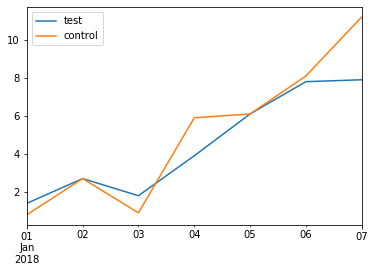

In [9]:
from datetime import datetime

from matplotlib import pyplot as plt
from scipy.stats import binom
import pandas as pd

%matplotlib inline

# средняя длительность смотрения до выкатки фичи
X_1 = [1.4, 2.7, 1.8, 3.9, 6.1, 7.8, 7.9]
# средняя длительность смотрения после выкатки фичи
X_2 = [0.8, 2.7, 0.9, 5.9, 6.1, 8.1, 11.2]
date_rng = pd.date_range(start='2018-01-01', periods=max(len(X_1), len(X_2)), freq='d')
pd.DataFrame(
    {'test': X_1, 'control': X_2},
    index=date_rng
).plot()

# биномиальное распределение успехов
binomial_7 = [binom.pmf(i, 7, 0.5) for i in range(8)]
cumulative_binomial_7 = [
    sum(binom.pmf(i, 7, 0.5) for i in range(i)) for i in range(9)
]

print(cumulative_binomial_7)

rank_indicator = [int(X_1[i]>X_2[i]) for i in range(len(X_1))]
print(rank_indicator)
median_index = int(len(X_1)/2)+1 if len(X_1) % 2 == 1 else int(len(X_1)/2)

stat = sum(rank_indicator)/len(X_1)

print("Истинность гипотезы H_0: {}".format(stat < cumulative_binomial_7[median_index]))

Ранговые критерии не делают предположений о законе распределения элементов выборки - этот вид критериев используются если распределение выборки неизвестно. 

Статистики ранговых критериев имеют табличное распределение, для них характерна нормальная аппроксимация статистики с ростом объёма выборки.


**Вариационный ряд** (set of order statistic) — последовательность значений заданной выборки $X^n=(X_1,\ldots,X_n)$ , расположенных в порядке неубывания: $X(1)\le \ldots \le X(2)$. 
Связка - это подмоножество объектов, у которых одинаковый средний ранг. Если элемент не в связке - его ранг совпадает с номером в вариационном ряду.

Пример рангового критерия: [критерий знаковых рангов Вилкоксона](http://www.machinelearning.ru/wiki/index.php?title=Критерий_знаковых_рангов_Уилкоксона), который проверяет гипотезу о равенстве медиан двух выборок $H_0: med(X^{n_1})=med(X^{n_2})$

Другие примеры

* Критерий [Манна-Уитни](https://ru.wikipedia.org/wiki/U-критерий_Манна_—_Уитни) о равенстве распределений


# Самостоятельное изучение


* курсы по статистике на Stepic:
    * [часть I](https://stepik.org/course/76/promo)
    * [часть II](https://stepik.org/course/524/promo)
    * [часть III](https://stepik.org/course/2152/promo)